In [ ]:
# CSE 572 – Homework 2 : Titanic, Trees, RF, SVM
# Author: Mohak Sharma | ASU ID: 1233869106

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

Decision Tree Accuracy: 0.7932960893854749


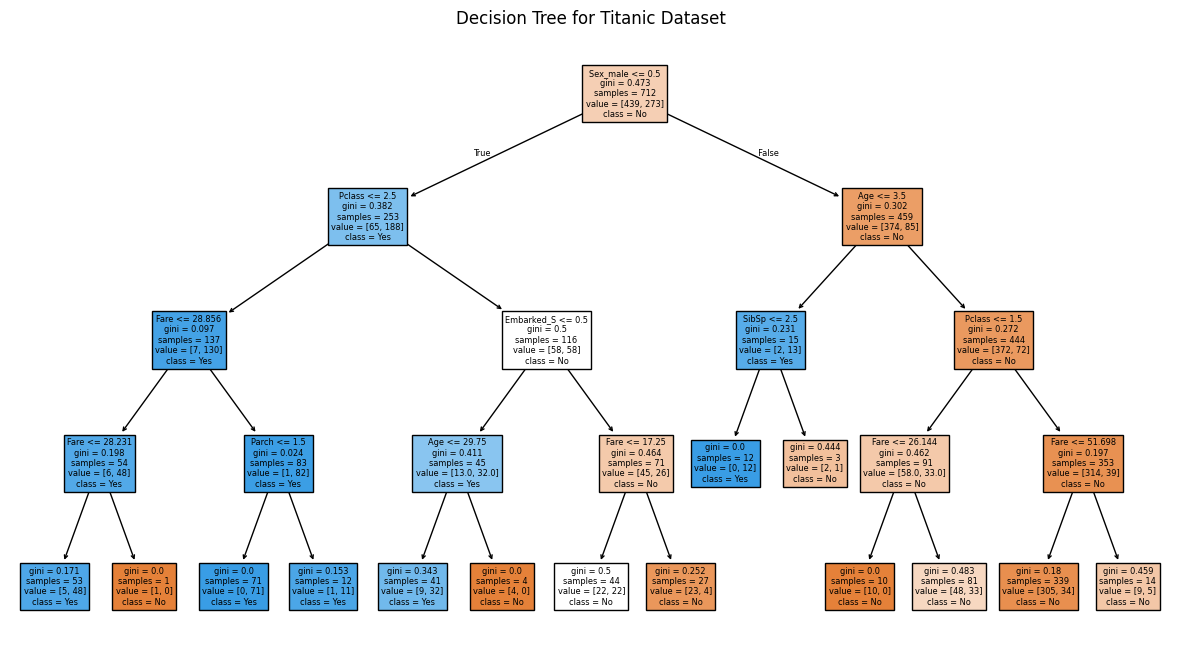

Decision Tree 5-Fold Mean Accuracy: 0.8193270981106021
Random Forest 5-Fold Mean Accuracy: 0.8271797125102003


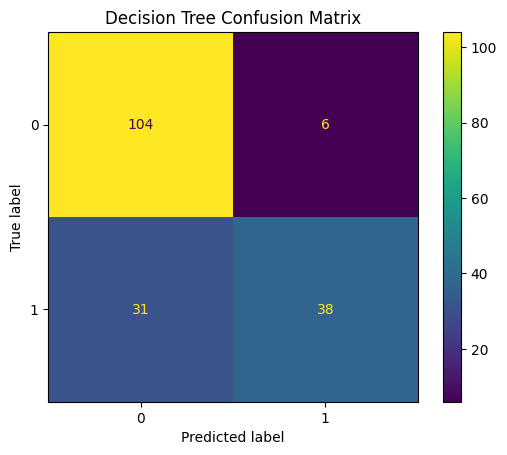


Observation:
The Random Forest performed slightly better than the Decision Tree (0.827 vs 0.819).
This happens because ensemble methods average multiple decision trees,
which helps reduce variance and produce more stable predictions.



In [5]:
# ----------------- TASK 1 -----------------
# Titanic Classification Challenge

# Load and preprocess the dataset (explicit HW2 preprocessing)
train_df = pd.read_csv("titanic/train.csv").copy()

# Handle missing values
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

# Drop unnecessary columns
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
train_df.drop(columns=drop_cols, inplace=True, errors="ignore")

# One-hot encode categorical columns
train_df = pd.get_dummies(train_df, drop_first=True)

# Split features and target
X = train_df.drop(columns=["Survived"])
y = train_df["Survived"].astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Decision Tree model
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Plot Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree for Titanic Dataset")
plt.savefig("decision_tree.png", dpi=200, bbox_inches="tight")
plt.show()

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_dt = cross_val_score(dt, X, y, cv=kf, scoring="accuracy")
print("Decision Tree 5-Fold Mean Accuracy:", np.mean(cv_dt))

# Random Forest model
rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
cv_rf = cross_val_score(rf, X, y, cv=kf, scoring="accuracy")
print("Random Forest 5-Fold Mean Accuracy:", np.mean(cv_rf))

# Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=200, bbox_inches="tight")
plt.show()

# Observation
print("""
Observation:
The Random Forest performed slightly better than the Decision Tree (0.827 vs 0.819).
This happens because ensemble methods average multiple decision trees,
which helps reduce variance and produce more stable predictions.
""")


In [6]:
# ----------------- TASK 2 -----------------
# Training Error and Testing
print("\nTask 2 – Training Error and Testing")

def training_error(leaves):
    errors = sum(min(p, n) for p, n in leaves)
    total = sum(p + n for p, n in leaves)
    return errors / total

print("""
The training error rate measures how well the decision tree fits the data.
For each leaf node, misclassified records are counted as the smaller class.
The overall error is the sum of all misclassified samples divided by total samples.
""")

# Example template usage
example_leaves = [(64, 181), (59, 56), (70, 105)]
print("Example Training Error:", training_error(example_leaves))

print("""
To classify a test instance T = {A=0, B=1, C=1, D=1, E=0},
follow each condition in the decision tree until reaching a leaf.
The class of the majority samples in that leaf becomes the prediction.
""")



Task 2 – Training Error and Testing

The training error rate measures how well the decision tree fits the data.
For each leaf node, misclassified records are counted as the smaller class.
The overall error is the sum of all misclassified samples divided by total samples.

Example Training Error: 0.35514018691588783

To classify a test instance T = {A=0, B=1, C=1, D=1, E=0},
follow each condition in the decision tree until reaching a leaf.
The class of the majority samples in that leaf becomes the prediction.



In [7]:
# ----------------- TASK 3 -----------------
# Understanding Splitting Process
print("\nTask 3 – Splitting Process")

def gini(pos, neg):
    s = pos + neg
    if s == 0: return 0
    p = pos / s
    q = 1 - p
    return 1 - (p**2 + q**2)

def gini_gain(parent, left, right):
    P = sum(parent)
    L = sum(left)
    R = sum(right)
    return gini(*parent) - (L/P)*gini(*left) - (R/P)*gini(*right)

print("""
Gini impurity measures how mixed a node is.
A value of 0 indicates a pure node, while 0.5 represents perfect mixing.
Gain is computed by comparing parent impurity and the weighted impurity after a split.
The attribute with the higher gain produces a better separation.
""")



Task 3 – Splitting Process

Gini impurity measures how mixed a node is.
A value of 0 indicates a pure node, while 0.5 represents perfect mixing.
Gain is computed by comparing parent impurity and the weighted impurity after a split.
The attribute with the higher gain produces a better separation.



In [8]:

# ----------------- TASK 4 -----------------
# Decision Tree Properties
print("\nTask 4 – Decision Tree Properties")

print("""
Q1: Are decision trees linear classifiers?
Decision trees are not linear classifiers. They split data based on axis-aligned rules,
creating rectangular partitions instead of straight boundaries. This lets them model
complex and non-linear feature interactions effectively.

Q2: Is misclassification error better than Gini index?
The misclassification error is not ideal because it only changes when the majority class flips,
making it insensitive to small class distribution changes. Gini index and entropy
respond smoothly to changes, resulting in better and more balanced splits.
""")


Task 4 – Decision Tree Properties

Q1: Are decision trees linear classifiers?
Decision trees are not linear classifiers. They split data based on axis-aligned rules,
creating rectangular partitions instead of straight boundaries. This lets them model
complex and non-linear feature interactions effectively.

Q2: Is misclassification error better than Gini index?
The misclassification error is not ideal because it only changes when the majority class flips,
making it insensitive to small class distribution changes. Gini index and entropy
respond smoothly to changes, resulting in better and more balanced splits.



In [9]:
# ----------------- TASK 5 -----------------
# Bagging and Random Forests
print("\nTask 5 – Bagging and Random Forests")

print("""
Bagging (Bootstrap Aggregation) reduces overfitting by combining results
from multiple trees trained on random data subsets. However, if trees
use the same strong features, their predictions become correlated,
limiting improvement. Random Forests solve this by randomly selecting
a subset of features at each split, which reduces correlation and improves
accuracy and generalization.
""")



Task 5 – Bagging and Random Forests

Bagging (Bootstrap Aggregation) reduces overfitting by combining results
from multiple trees trained on random data subsets. However, if trees
use the same strong features, their predictions become correlated,
limiting improvement. Random Forests solve this by randomly selecting
a subset of features at each split, which reduces correlation and improves
accuracy and generalization.




Task 6 – SVM Kernel and Margin


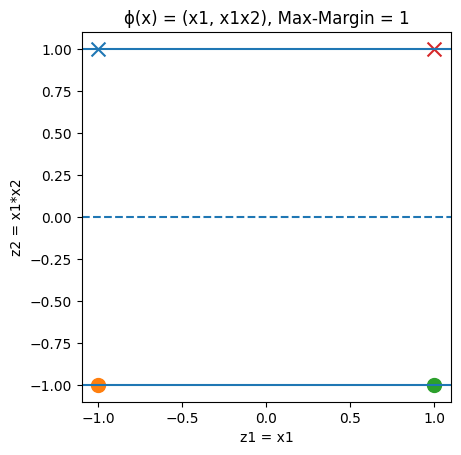


After mapping inputs ϕ(x) = (x1, x1x2), the positive and negative samples
become separable along the z2-axis. The maximum margin hyperplane is z2 = 0,
and the margin width is 1. This demonstrates how kernel transformations
make non-linear data linearly separable in higher dimensions.



In [10]:
# ----------------- TASK 6 -----------------
# SVM Kernel and Margin
print("\nTask 6 – SVM Kernel and Margin")

pts = [(-1,1), (-1,-1), (1,-1), (1,1)]
labs = [-1, +1, +1, -1]

for (x, y), c in zip(pts, labs):
    plt.scatter(x, y, marker="o" if c==1 else "x", s=100)
plt.axhline(0, ls="--")
plt.axhline(1)
plt.axhline(-1)
plt.xlabel("z1 = x1")
plt.ylabel("z2 = x1*x2")
plt.title("ϕ(x) = (x1, x1x2), Max-Margin = 1")
plt.gca().set_aspect("equal", "box")
plt.savefig("svm_margin.png", dpi=200, bbox_inches="tight")
plt.show()

print("""
After mapping inputs ϕ(x) = (x1, x1x2), the positive and negative samples
become separable along the z2-axis. The maximum margin hyperplane is z2 = 0,
and the margin width is 1. This demonstrates how kernel transformations
make non-linear data linearly separable in higher dimensions.
""")


In [11]:

# ----------------- TASK 7 -----------------
# Linear Separability of Circles
print("\nTask 7 – Linear Separability of Circles")

print("""
The equation (x1 - a)^2 + (x2 - b)^2 - r^2 = 0 expands to
x1^2 + x2^2 - 2a x1 - 2b x2 + (a^2 + b^2 - r^2) = 0.
When data is mapped to the feature space [x1, x2, x1^2, x2^2, 1],
the equation becomes linear in these terms. This shows that a circle
can be separated by a linear boundary in a quadratic feature space.
""")


Task 7 – Linear Separability of Circles

The equation (x1 - a)^2 + (x2 - b)^2 - r^2 = 0 expands to
x1^2 + x2^2 - 2a x1 - 2b x2 + (a^2 + b^2 - r^2) = 0.
When data is mapped to the feature space [x1, x2, x1^2, x2^2, 1],
the equation becomes linear in these terms. This shows that a circle
can be separated by a linear boundary in a quadratic feature space.



In [12]:
# ----------------- TASK 8 -----------------
# Ellipses and Polynomial Kernels
print("\nTask 8 – Ellipses and Polynomial Kernels")

print("""
The ellipse equation c(x1 - a)^2 + d(x2 - b)^2 - 1 = 0 expands to
c x1^2 + d x2^2 - 2ac x1 - 2bd x2 + (c a^2 + d b^2 - 1) = 0.
A degree-2 polynomial kernel K(u,v) = (1 + u·v)^2 corresponds
to the feature space [1, x1, x2, x1^2, x2^2, x1x2],
which makes the ellipse boundary linear in that space.
This proves that quadratic kernels can separate any elliptic region
from the rest of the plane.
""")



Task 8 – Ellipses and Polynomial Kernels

The ellipse equation c(x1 - a)^2 + d(x2 - b)^2 - 1 = 0 expands to
c x1^2 + d x2^2 - 2ac x1 - 2bd x2 + (c a^2 + d b^2 - 1) = 0.
A degree-2 polynomial kernel K(u,v) = (1 + u·v)^2 corresponds
to the feature space [1, x1, x2, x1^2, x2^2, x1x2],
which makes the ellipse boundary linear in that space.
This proves that quadratic kernels can separate any elliptic region
from the rest of the plane.

